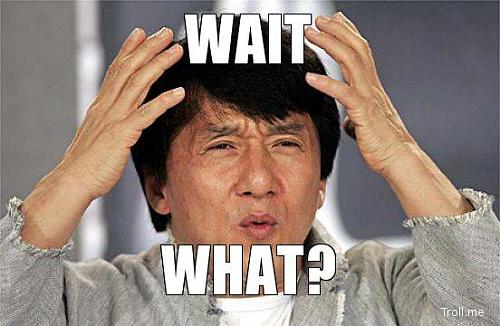

In [117]:
from pyforest import *

In [118]:
data = pd.read_csv("online_shoppers_intention.csv")

In [119]:
import pandas_profiling
data.profile_report()
# one high way is like doing Pandas Profiling, for Statistical, feature and row analysis. also old school method from next cell.

In [120]:
data.shape   # shape of the dataset
# so the dataset is saying we are the shopping_site stores data in 18 CATEGORIES. 

(12330, 18)

In [121]:
data.isnull().sum().sum()    # doesn't have any null values

0

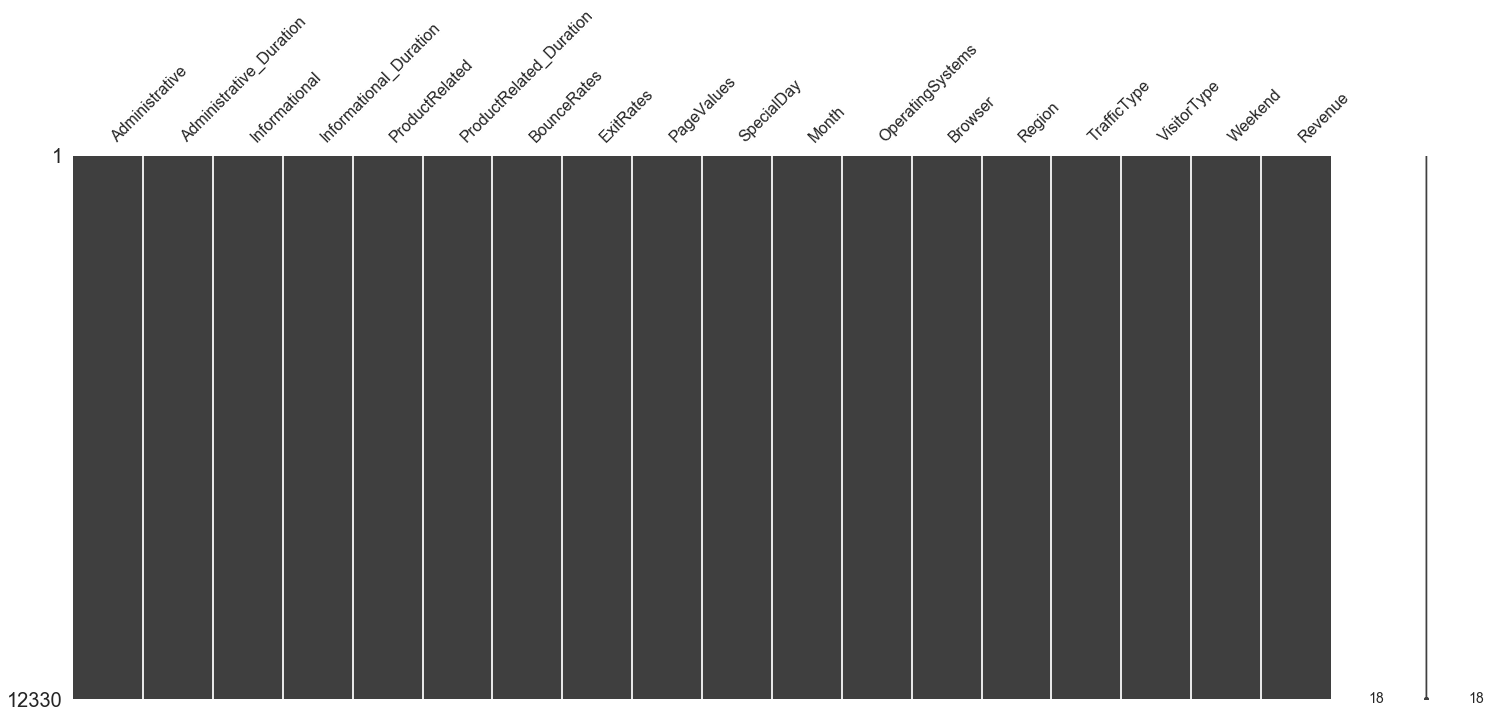

In [122]:
import missingno
missingno.matrix(data);
# no missing data in session rows found

In [8]:
%%time
data.describe() # just find the deviation and mean, also mean and median data difference

Wall time: 141 ms


Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [9]:
# use .describe(include='all') to get statistics for all  columns including non-numeric ones
data.describe(include='all')

Administrative  Administrative_Duration  Informational  \
count     12330.000000             12330.000000   12330.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.315166                80.818611       0.503569   
std           3.321784               176.779107       1.270156   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 7.500000       0.000000   
75%           4.000000                93.256250       0.000000   
max          27.000000              3398.750000      24.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             12330.000000    12330.000000             12330.000000   
unique                     NaN             NaN                      NaN   
top                        NaN             NaN                      NaN   
freq                       NaN             NaN                      NaN   
mean                 34.472398       31.731468              1194.746220   
std                 140.749294       44.475503              1913.669288   
min                   0.000000        0.000000                 0.000000   
25%                   0.000000        7.000000               184.137500   
50%                   0.000000       18.000000               598.936905   
75%                   0.000000       38.000000              1464.157213   
max                2549.375000      705.000000             63973.522230   

         BounceRates     ExitRates    PageValues    SpecialDay  Month  \
count   12330.000000  12330.000000  12330.000000  12330.000000  12330   
unique           NaN           NaN           NaN           NaN     10   
top              NaN           NaN           NaN           NaN    May   
freq             NaN           NaN           NaN           NaN   3364   
mean        0.022191      0.043073      5.889258      0.061427    NaN   
std         0.048488      0.048597     18.568437      0.198917    NaN   
min         0.000000      0.000000      0.000000      0.000000    NaN   
25%         0.000000      0.014286      0.000000      0.000000    NaN   
50%         0.003112      0.025156      0.000000      0.000000    NaN   
75%         0.016813      0.050000      0.000000      0.000000    NaN   
max         0.200000      0.200000    361.763742      1.000000    NaN   

        OperatingSystems       Browser        Region   TrafficType  \
count       12330.000000  12330.000000  12330.000000  12330.000000   
unique               NaN           NaN           NaN           NaN   
top                  NaN           NaN           NaN           NaN   
freq                 NaN           NaN           NaN           NaN   
mean            2.124006      2.357097      3.147364      4.069586   
std             0.911325      1.717277      2.401591      4.025169   
min             1.000000      1.000000      1.000000      1.000000   
25%             2.000000      2.000000      1.000000      2.000000   
50%             2.000000      2.000000      3.000000      2.000000   
75%             3.000000      2.000000      4.000000      4.000000   
max             8.000000     13.000000      9.000000     20.000000   

              VisitorType Weekend Revenue  
count               12330   12330   12330  
unique                  3       2       2  
top     Returning_Visitor   False   False  
freq                10551    9462   10422  
mean                  NaN     NaN     NaN  
std                   NaN     NaN     NaN  
min                   NaN     NaN     NaN  
25%                   NaN     NaN     NaN  
50%                   NaN     NaN     NaN  
75%                   NaN     NaN     NaN  
max                   NaN     NaN     NaN

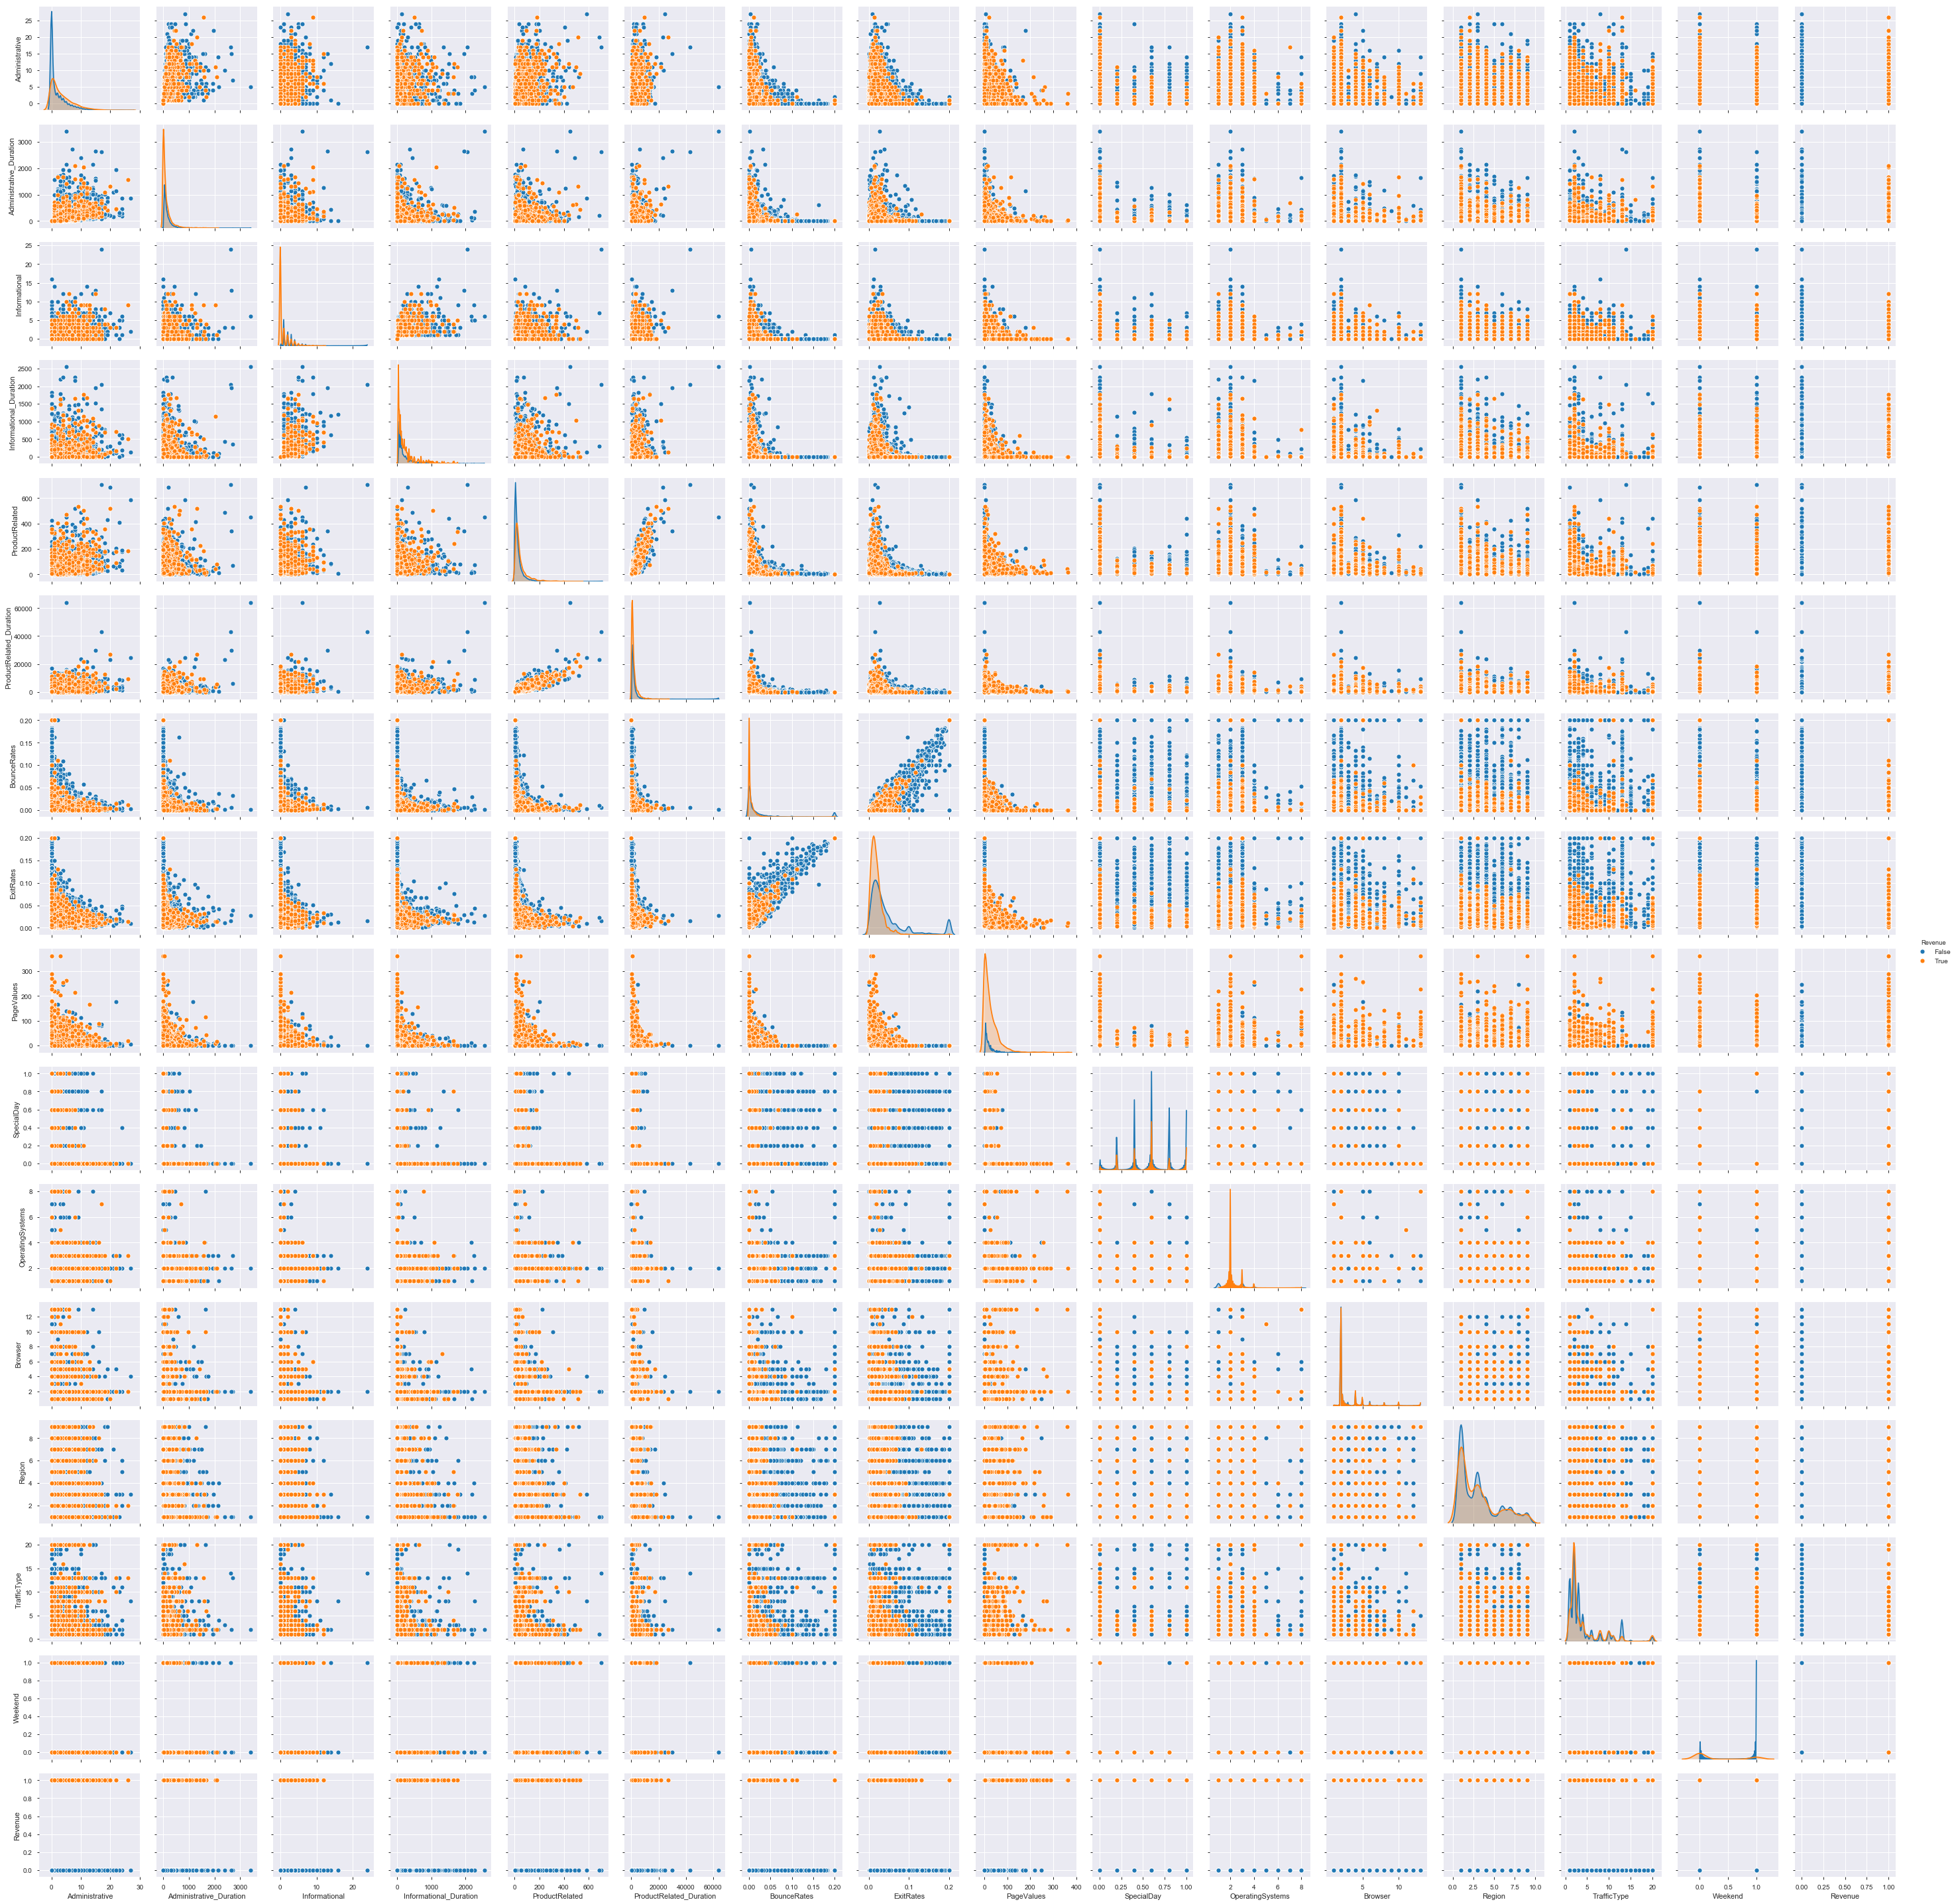

In [10]:
sns.pairplot(data,hue='Revenue');

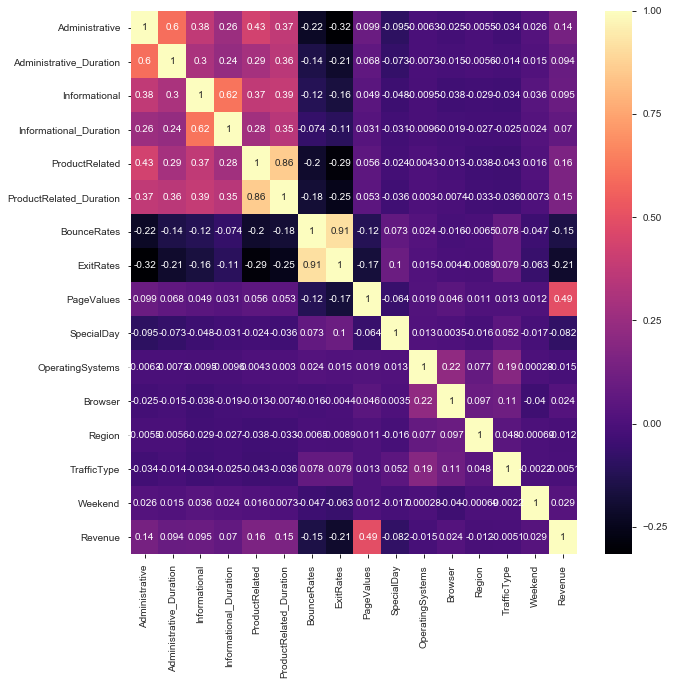

In [11]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True,cmap="magma");
# annot is used to annotate the heatmap.
# cmap give it color

In [12]:
#data.dtypes.value_counts()
data.info()    # we have  bool(2), float64(7), int64(7), object(2)
# we can also say we have actually 18 NUMERICAL COLUMNS and 8 CATEGORICAL COLUMNS.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [13]:
# categorical column : Counts
data.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [14]:
# categorical column : Proprotions
data.Revenue.value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

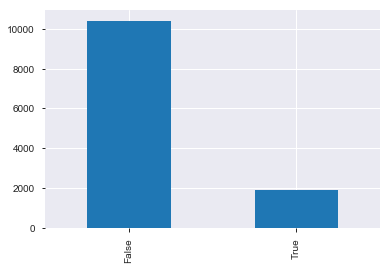

In [15]:
# visualize counts
data.Revenue.value_counts().plot(kind='bar');

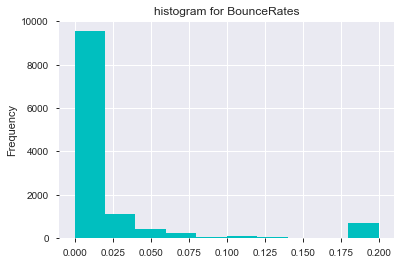

In [16]:
# use hist to create histogram
data.BounceRates.plot(kind='hist', title='histogram for BounceRates', color='c');

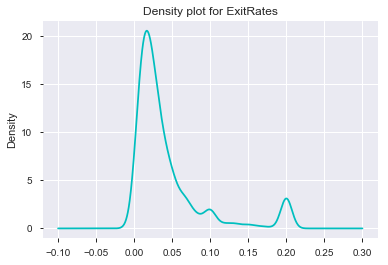

In [17]:
# use kde for density plot
#Kernel Density Estimation
data.ExitRates.plot(kind='kde', title='Density plot for ExitRates', color='c');

In [18]:
data.select_dtypes("bool").head(2)     # selecting only boolean datatypes

Weekend  Revenue
0    False    False
1    False    False

In [19]:
data.select_dtypes("float").head(2)      #selecting only float datatypes

Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
0                      0.0                     0.0                      0.0   
1                      0.0                     0.0                     64.0   

   BounceRates  ExitRates  PageValues  SpecialDay  
0          0.2        0.2         0.0         0.0  
1          0.0        0.1         0.0         0.0

In [20]:
data.select_dtypes("int64").head(2)     # selecting integer datatype

Administrative  Informational  ProductRelated  OperatingSystems  Browser  \
0               0              0               1                 1        1   
1               0              0               2                 2        2   

   Region  TrafficType  
0       1            1  
1       1            2

In [21]:
data.select_dtypes("object").head(2)     # selecting object datatypes

Month        VisitorType
0   Feb  Returning_Visitor
1   Feb  Returning_Visitor

In [22]:
data.select_dtypes("object").head(2)

Month        VisitorType
0   Feb  Returning_Visitor
1   Feb  Returning_Visitor

In [23]:
# One-Hot-Encoding is used to create dummry variables 
# to replace the categories in a categorical variable 
# into features of each category and represent it using 1 or 0 


# df_dummies= pd.get_dummies(data, columns=['Weekend',"Revenue"])

In [24]:
 #data = data.append(df_dummies,sort=False)

In [26]:
data.columns   # finding columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [27]:
data.Revenue.value_counts()    # as we clearly see it's an IMBALANCE Dataset
# 10422 rows are -vely class session (almost 84.5%) that didn't go with shopping or can't turn the purchase into Revenue.
# 1908 rows are +vely class session (almost 15.5%) whose purchase was converting Revenue.

# its clear from above class ratio that it's an Imbalanced dataset problem.

False    10422
True      1908
Name: Revenue, dtype: int64

In [28]:
data.Revenue.value_counts(normalize=True)   # compaare the class Ratio, class is not comparable, possible solution is SMOTE

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

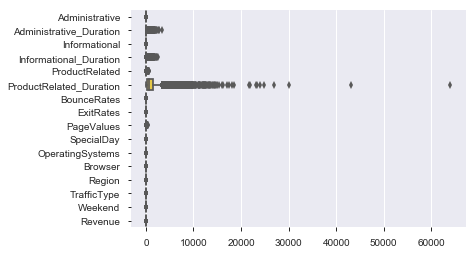

In [29]:
fig, axs = plt.subplots()
sns.boxplot(data=data,orient='h',palette="Set2")
plt.show()

# finding the outliers
# clearly found ProductRelated_Duration data, some data is above, above whisker.

In [30]:
q75, q25 = np.percentile(data["ProductRelated_Duration"], [75 ,25])
iqr = q75-q25
print("IQR",iqr)
whisker = q75 + (1.5*iqr)
print("Upper whisker",whisker)
# dealing with outliers in ProductRelated_Duration
#compare IQR and Upper Whisker values

IQR 1280.0197134999999
Upper whisker 3384.1867837499994


In [31]:
data["ProductRelated_Duration"] = data["ProductRelated_Duration"].clip(upper=whisker)
# dealaing with outliers just simply by clipping out  data above upper whisker

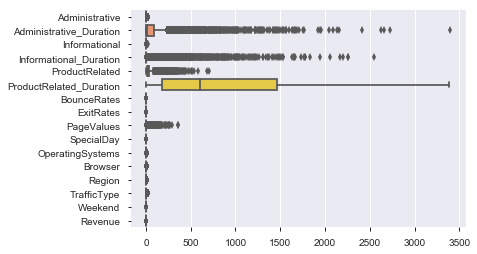

In [32]:
fig, axs = plt.subplots()
sns.boxplot(data=data,orient='h',palette="Set2")
plt.show()
# printing data after outlier detection
# so we have seen that data havestill outliers in other columns like, Administrative_Duration,Informational_Duration, ProductRelated
# page values

# but we will not do outlier removal as we will leave loophole in model, for not considering them

In [33]:
pd.crosstab(data["Revenue"],data["Region"],margins=True) # Relation between categorical vs categorical variable

Region      1     2     3     4    5    6    7    8    9    All
Revenue                                                        
False    4009   948  2054  1007  266  693  642  378  425  10422
True      771   188   349   175   52  112  119   56   86   1908
All      4780  1136  2403  1182  318  805  761  434  511  12330

In [34]:
pd.crosstab(data["Revenue"],data["Month"],margins=True)

Month    Aug   Dec  Feb  Jul  June   Mar   May   Nov  Oct  Sep    All
Revenue                                                              
False    357  1511  181  366   259  1715  2999  2238  434  362  10422
True      76   216    3   66    29   192   365   760  115   86   1908
All      433  1727  184  432   288  1907  3364  2998  549  448  12330

In [35]:
pd.crosstab(data["Revenue"],data["SpecialDay"],margins=True)

SpecialDay    0.0  0.2  0.4  0.6  0.8  1.0    All
Revenue                                          
False        9248  164  230  322  314  144  10422
True         1831   14   13   29   11   10   1908
All         11079  178  243  351  325  154  12330

In [36]:
pd.crosstab(data["Revenue"],data["OperatingSystems"],margins=True)

OperatingSystems     1     2     3    4  5   6  7   8    All
Revenue                                                     
False             2206  5446  2287  393  5  17  6  62  10422
True               379  1155   268   85  1   2  1  17   1908
All               2585  6601  2555  478  6  19  7  79  12330

In [37]:
pd.crosstab(data["Revenue"],data["Weekend"],margins=True)

Weekend  False  True    All
Revenue                    
False     8053  2369  10422
True      1409   499   1908
All       9462  2868  12330

In [38]:
 pd.crosstab(data["Revenue"],data["TrafficType"],margins=True)

TrafficType     1     2     3     4    5    6   7    8   9   10  ...  12   13  \
Revenue                                                          ...            
False        2189  3066  1872   904  204  391  28  248  38  360  ...   1  695   
True          262   847   180   165   56   53  12   95   4   90  ...   0   43   
All          2451  3913  2052  1069  260  444  40  343  42  450  ...   1  738   

TrafficType  14  15  16  17  18  19   20    All  
Revenue                                          
False        11  38   2   1  10  16  148  10422  
True          2   0   1   0   0   1   50   1908  
All          13  38   3   1  10  17  198  12330  

[3 rows x 21 columns]

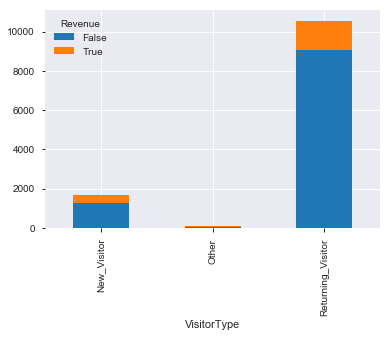

In [39]:
df2 = pd.crosstab(data['VisitorType'], data['Revenue'])
df2.plot(kind='bar',stacked=True);

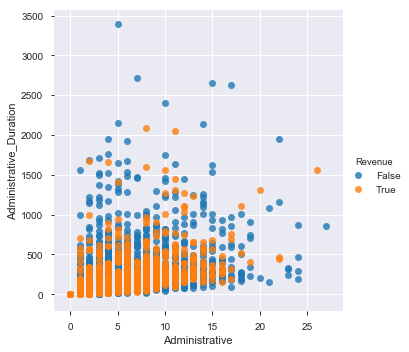

In [40]:
sns.lmplot('Administrative','Administrative_Duration',  data=data, hue='Revenue', fit_reg=False);

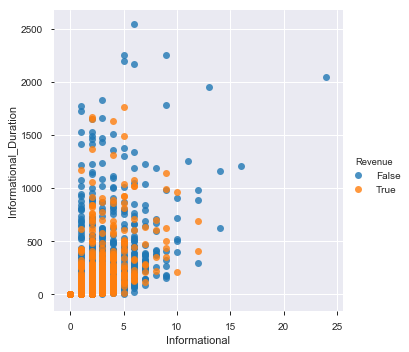

In [41]:
sns.lmplot('Informational','Informational_Duration',  data=data, hue='Revenue', fit_reg=False);

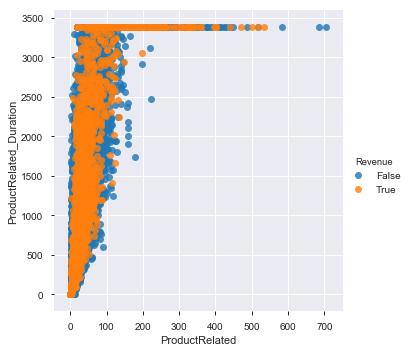

In [42]:
sns.lmplot('ProductRelated','ProductRelated_Duration',  data=data, hue='Revenue', fit_reg=False);

In [43]:
data['VisitorType'].value_counts()    # Univariate Analysis of Data

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

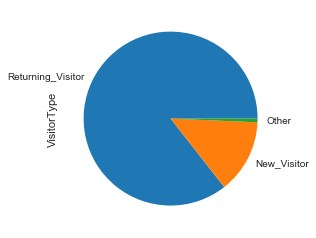

In [44]:
data['VisitorType'].value_counts().plot(kind="pie");    # Returning visitor is high and there is other visitor category also 
# we can add it with returning or new visitor   

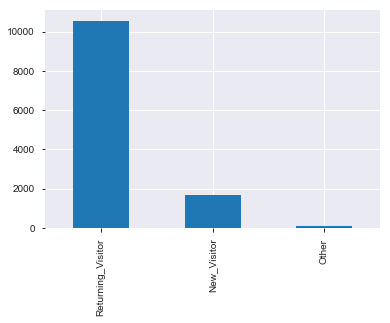

In [45]:
data['VisitorType'].value_counts().plot(kind="bar");

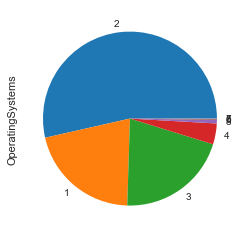

In [46]:
data['OperatingSystems'].value_counts().plot(kind="pie");  # operating system 2 is used more for grenerating Revenue

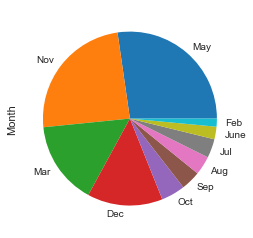

In [47]:
data['Month'].value_counts().plot(kind="pie");  # May, November and March contributed more towards Revenue

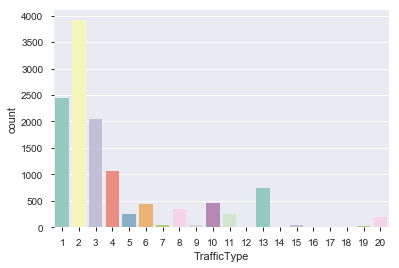

In [48]:
sns.countplot(data['TrafficType'], palette='Set3');  # We can make count plot also

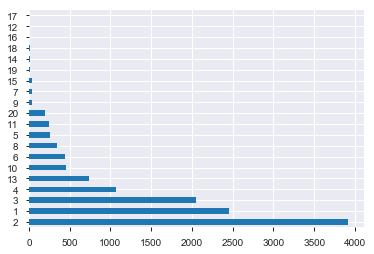

In [49]:
data['TrafficType'].value_counts().plot(kind="barh"); # 2 contributed more

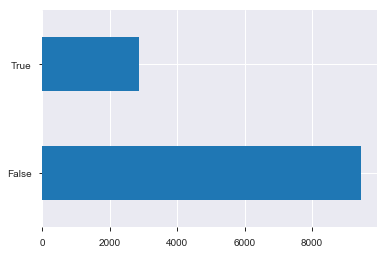

In [50]:
data['Weekend'].value_counts().plot(kind="barh");

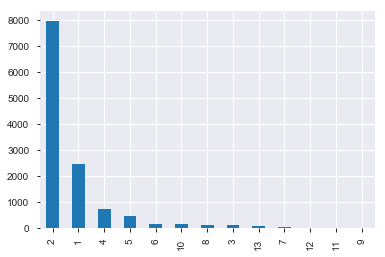

In [51]:
data['Browser'].value_counts().plot(kind="bar");

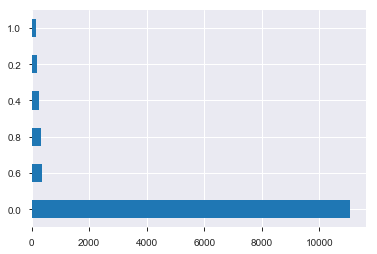

In [52]:
data['SpecialDay'].value_counts().plot(kind="barh"); # on special day revenue is not converted more,
#  because of special day came to 1 day but 0.0 day that is not a special aare all the day of week 
# so oviously it is giving more revenue

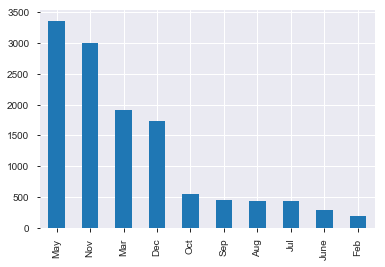

In [53]:
data['Month'].value_counts().plot(kind="bar");    # may,Nov,march,december is giving more revenue

In [54]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [55]:
# seeing  Exit Rate on Product related page and duration, Administrative and Informational

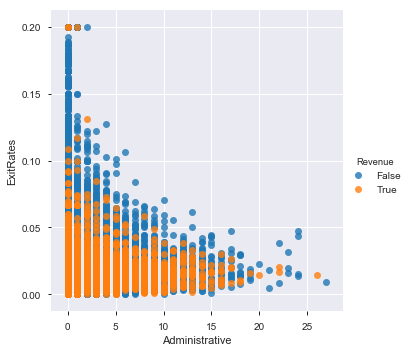

In [56]:
sns.lmplot('Administrative','ExitRates',  data=data, hue='Revenue', fit_reg=False);

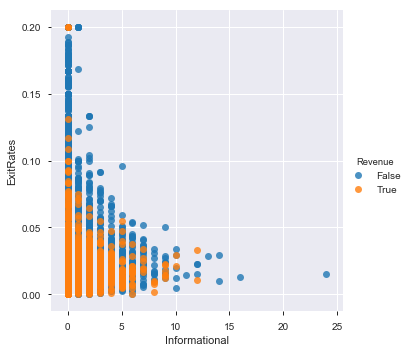

In [57]:
sns.lmplot('Informational','ExitRates',  data=data, hue='Revenue', fit_reg=False);

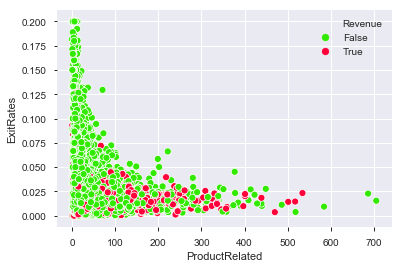

In [58]:
sns.scatterplot(x='ProductRelated',y='ExitRates', data=data, hue='Revenue',palette='prism');

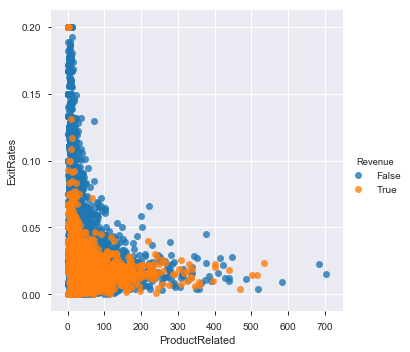

In [59]:
sns.lmplot('ProductRelated','ExitRates',  data=data, hue='Revenue', fit_reg=False);    # same from above with lmplot

In [60]:
# seeing  Bounce Rate on Product related page, Administrative and Informational

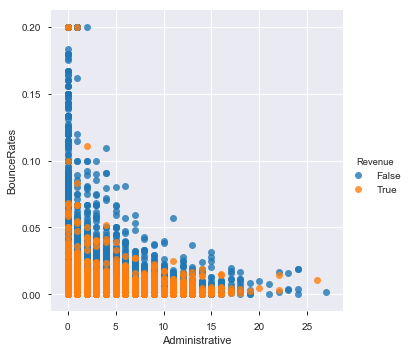

In [61]:
sns.lmplot('Administrative','BounceRates',  data=data, hue='Revenue', fit_reg=False);

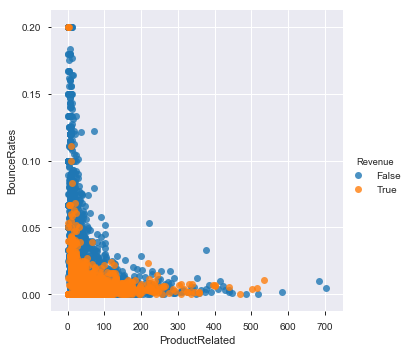

In [62]:
sns.lmplot('ProductRelated','BounceRates',  data=data, hue='Revenue', fit_reg=False);

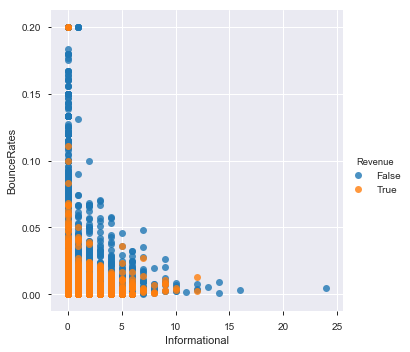

In [63]:
sns.lmplot('Informational','BounceRates',  data=data, hue='Revenue', fit_reg=False);

In [64]:
# seeing  Page Value on Product , Administrative and Informational related duration

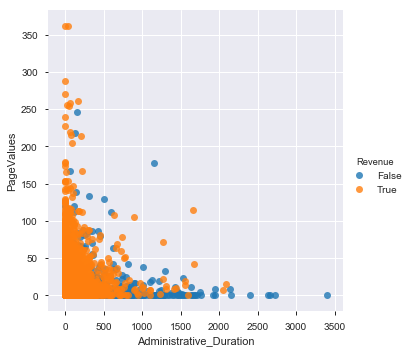

In [65]:
sns.lmplot('Administrative_Duration','PageValues',  data=data, hue='Revenue', fit_reg=False);

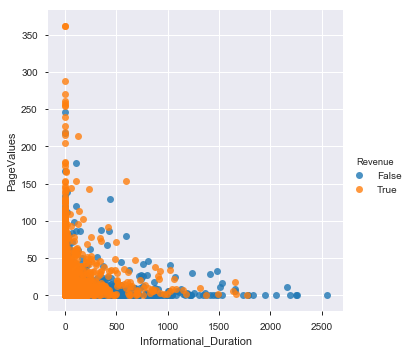

In [66]:
sns.lmplot('Informational_Duration','PageValues',  data=data, hue='Revenue', fit_reg=False);

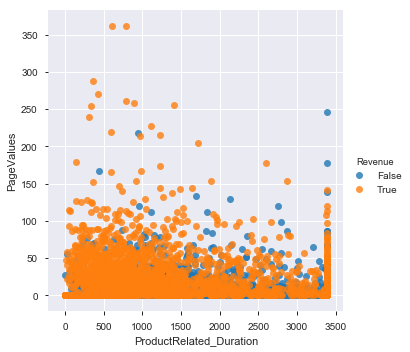

In [67]:
sns.lmplot('ProductRelated_Duration','PageValues',  data=data, hue='Revenue', fit_reg=False);

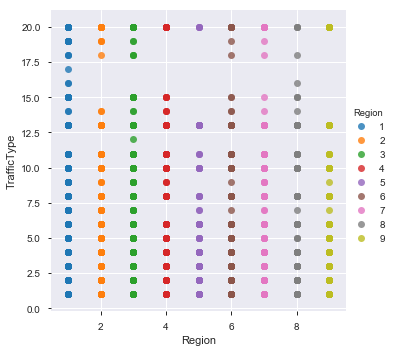

In [68]:
sns.lmplot('Region','TrafficType',  data=data, hue='Region', fit_reg=False);

<Figure size 1080x720 with 0 Axes>

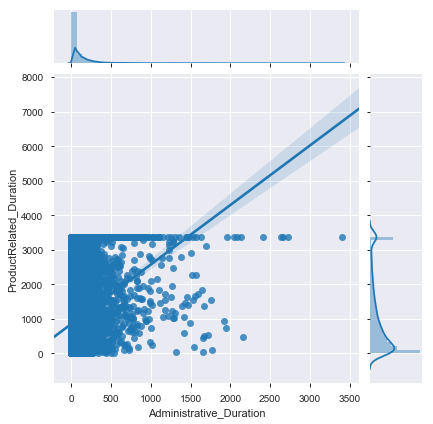

In [69]:
plt.figure(figsize = (15,10))
sns.jointplot(data.Administrative_Duration,data.ProductRelated_Duration,kind="regg");

#### Statistical Analysis

In [74]:
numerical = data.select_dtypes(["int64","float64"])
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sms

In [75]:
# for each numerical and categorical:
# Statistical tests for feature selection (Filter methods) :
# Anova for numerical vs categorical
for num in data.select_dtypes(include=['int64','float64']):
    for cat in data.select_dtypes(include=['category','bool']):
        print(f'{num} vs {cat}:') 
        model_each = ols(str(num)+'~'+str(cat),data = data).fit()
        print(sms.stats.anova_lm(model_each),'\n\n')

Administrative vs Weekend:
               df         sum_sq    mean_sq         F    PR(>F)
Weekend       1.0      94.935674  94.935674  8.609037  0.003351
Residual  12328.0  135946.328235  11.027444       NaN       NaN 


Administrative vs Revenue:
               df        sum_sq      mean_sq           F        PR(>F)
Revenue       1.0    2625.31874  2625.318740  242.586667  3.519760e-54
Residual  12328.0  133415.94517    10.822189         NaN           NaN 


Administrative_Duration vs Weekend:
               df        sum_sq       mean_sq         F    PR(>F)
Weekend       1.0  8.657674e+04  86576.737305  2.770778  0.096025
Residual  12328.0  3.852052e+08  31246.365015       NaN       NaN 


Administrative_Duration vs Revenue:
               df        sum_sq       mean_sq           F        PR(>F)
Revenue       1.0  3.374568e+06  3.374568e+06  108.928515  2.146514e-25
Residual  12328.0  3.819172e+08  3.097966e+04         NaN           NaN 


Informational vs Weekend:
               df

In [125]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sms

# H0: Features have no significance with each other [if:--> mean(f1) = mean(f2) = mean(f3)]
# H1: Features have significance with each other [if:--> mean(f1) != mean(f2) != mean(f3)]

model_SD_Rev = ols('SpecialDay~Revenue+Weekend+VisitorType',data = data).fit()
sms.stats.anova_lm(model_SD_Rev)

df      sum_sq   mean_sq          F        PR(>F)
Revenue          1.0    3.304616  3.304616  84.610449  4.212774e-20
Weekend          1.0    0.100627  0.100627   2.576418  1.084925e-01
VisitorType      2.0    3.054144  1.527072  39.098709  1.183823e-17
Residual     12325.0  481.375491  0.039057        NaN           NaN

In [126]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sms


model_SD_Rev = ols('SpecialDay~Revenue+Weekend',data = data).fit()
sms.stats.anova_lm(model_SD_Rev)

df      sum_sq   mean_sq          F        PR(>F)
Revenue       1.0    3.304616  3.304616  84.090656  5.469673e-20
Weekend       1.0    0.100627  0.100627   2.560590  1.095833e-01
Residual  12327.0  484.429634  0.039298        NaN           NaN

In [86]:
model_ER_Rev = ols('ExitRates~Revenue+Month+Weekend+VisitorType',data = data).fit()
sms.stats.anova_lm(model_ER_Rev)

df     sum_sq   mean_sq           F         PR(>F)
Revenue          1.0   1.248468  1.248468  576.720238  1.383992e-124
Month            9.0   0.447610  0.049734   22.974445   2.806796e-39
Weekend          1.0   0.079719  0.079719   36.825724   1.329687e-09
VisitorType      2.0   0.679323  0.339661  156.903980   5.141890e-68
Residual     12316.0  26.661339  0.002165         NaN            NaN

In [87]:
model_BR_Rev = ols('PageValues~Revenue+Month+VisitorType',data = data).fit()
sms.stats.anova_lm(model_BR_Rev)

df        sum_sq       mean_sq            F        PR(>F)
Revenue          1.0  1.031367e+06  1.031367e+06  3992.049379  0.000000e+00
Month            9.0  1.556026e+04  1.728918e+03     6.692017  1.283375e-09
VisitorType      2.0  2.178806e+04  1.089403e+04    42.166864  5.617879e-19
Residual     12317.0  3.182162e+06  2.583553e+02          NaN           NaN

In [88]:
import scipy.stats as stats
# H0: Features have no significance with each other
# H1: Features have significance with each other
for i in data.drop('Revenue',axis=1).select_dtypes(include=['category','bool']):
    chisqStat, pvalue, dof, expfreq=stats.chi2_contingency(pd.crosstab(data.Revenue,data[i]))
    print(f'Chi-Square test of Revenue vs {i}:\nDegrees Of Freedom = {dof}\nchisq_Stats = {chisqStat}\nP-value = {pvalue}\n\n')

Chi-Square test of Revenue vs Weekend:
Degrees Of Freedom = 1
chisq_Stats = 10.390978319534856
P-value = 0.0012663251061221968




In [89]:
# Inferences of chi-square:
# Except Region we get that p_value>0.05, So hence, we reject null hypothesis for them.
# Hence, Except Region all other categorical features shows significant dependency on target var. (Revenue) through this statistical Chi-square test.

In [90]:
import scipy.stats as stats
statistic, p_value = stats.ttest_rel(data.Informational_Duration,data.Revenue)
print('p-value: ',p_value)
# our p-value is much less than our significance level 0.05 i.e 5%

p-value:  6.461987397037837e-157


In [91]:
statistic, p_value = stats.ttest_rel(data.ProductRelated_Duration,data.Revenue)
print('p-value: ',p_value)

p-value:  0.0


In [92]:
statistic, p_value = stats.ttest_rel(data.Administrative_Duration,data.Revenue)
print('p-value: ',p_value)

p-value:  0.0


In [93]:
import statsmodels.api as sms
for i in numerical:
    string=str(i)+'~Revenue'
    model=ols(formula=string,data=data).fit()
    print(sms.stats.anova_lm(model))

    # almost all have p_value less than 0.05

               df        sum_sq      mean_sq           F        PR(>F)
Revenue       1.0    2625.31874  2625.318740  242.586667  3.519760e-54
Residual  12328.0  133415.94517    10.822189         NaN           NaN
               df        sum_sq       mean_sq           F        PR(>F)
Revenue       1.0  3.374568e+06  3.374568e+06  108.928515  2.146514e-25
Residual  12328.0  3.819172e+08  3.097966e+04         NaN           NaN
               df        sum_sq     mean_sq           F        PR(>F)
Revenue       1.0    180.268271  180.268271  112.751843  3.174034e-26
Residual  12328.0  19710.074713    1.598806         NaN           NaN
               df        sum_sq       mean_sq          F        PR(>F)
Revenue       1.0  1.208595e+06  1.208595e+06  61.306613  5.282871e-15
Residual  12328.0  2.430334e+08  1.971393e+04        NaN           NaN
               df        sum_sq        mean_sq          F        PR(>F)
Revenue       1.0  6.129658e+05  612965.822068  317.84435  3.241187e-70
Resi

Skewness: 6.382964
Kurtosis: 65.635694


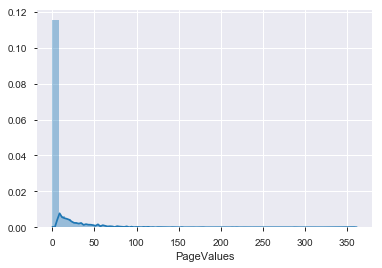

In [94]:
sns.distplot(data['PageValues']);
# skewness and kurtosis of PageValues

print("Skewness: %f" % data['PageValues'].skew())
print("Kurtosis: %f" % data['PageValues'].kurt())

Skewness: 2.148789
Kurtosis: 4.017035


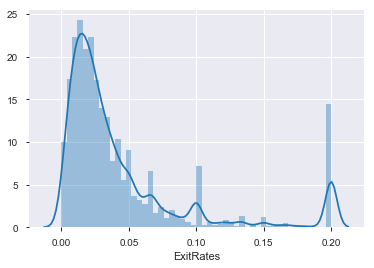

In [95]:
sns.distplot(data['ExitRates']);
# skewness and kurtosis of ExitRates

print("Skewness: %f" % data['ExitRates'].skew())
print("Kurtosis: %f" % data['ExitRates'].kurt())

Skewness: 2.947855
Kurtosis: 7.723159


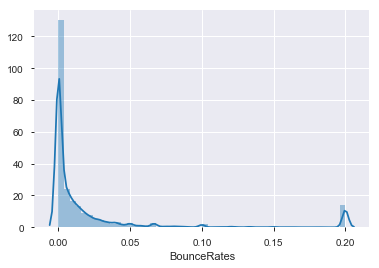

In [96]:
sns.distplot(data['BounceRates']);
# skewness and kurtosis of Bouncerates

print("Skewness: %f" % data['BounceRates'].skew())
print("Kurtosis: %f" % data['BounceRates'].kurt())

In [97]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Skewness: 5.615719
Kurtosis: 50.556739


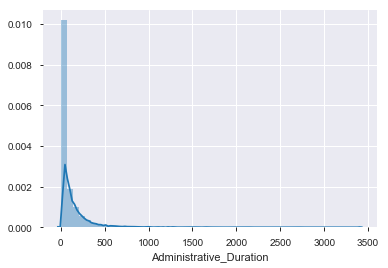

In [98]:
sns.distplot(data['Administrative_Duration']);
# skewness and kurtosis of Administrative_Duration

print("Skewness: %f" % data['Administrative_Duration'].skew())
print("Kurtosis: %f" % data['Administrative_Duration'].kurt())

Skewness: 7.579185
Kurtosis: 76.316853


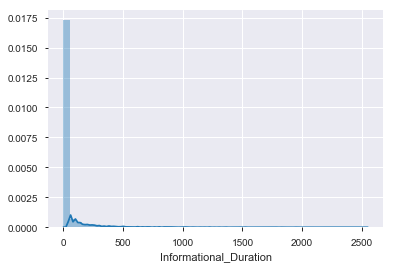

In [99]:
sns.distplot(data['Informational_Duration']);
# skewness and kurtosis of Informational_Duration

print("Skewness: %f" % data['Informational_Duration'].skew())
print("Kurtosis: %f" % data['Informational_Duration'].kurt())

Skewness: 1.159401
Kurtosis: 0.195250


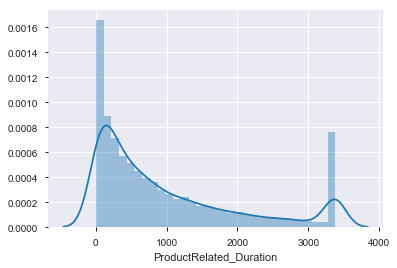

In [100]:
sns.distplot(data['ProductRelated_Duration']);
# skewness and kurtosis of ProductRelated_Duration

print("Skewness: %f" % data['ProductRelated_Duration'].skew())
print("Kurtosis: %f" % data['ProductRelated_Duration'].kurt())

In [101]:
#### so we can see most of the columns data is right skewed

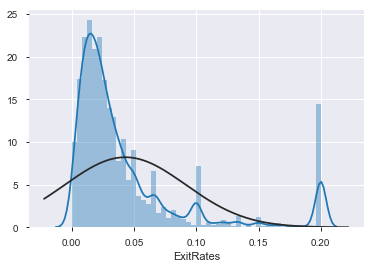

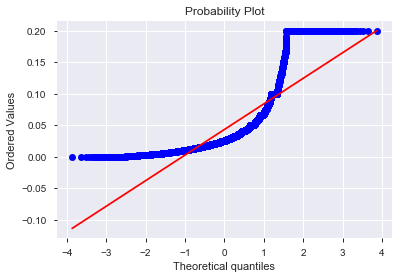

In [102]:
from scipy.stats import norm
sns.distplot(data['ExitRates'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['ExitRates'], plot=plt)

# normal Probability test for the exitrates, also we can do it for columns like bouncerate, page value
# Normal Test Plots (also called Normal Probability Plots or Normal Quartile Plots)
# are used to find whether process data follows the standard normal "bell curve" or Gaussian distribution.

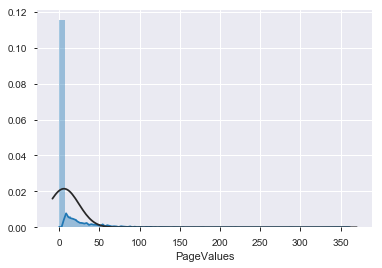

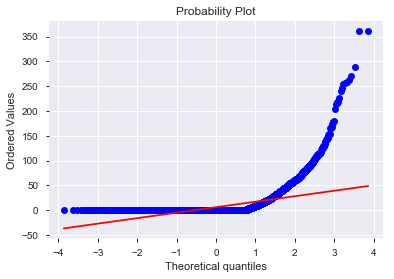

In [103]:
from scipy.stats import norm
sns.distplot(data['PageValues'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['PageValues'], plot=plt)

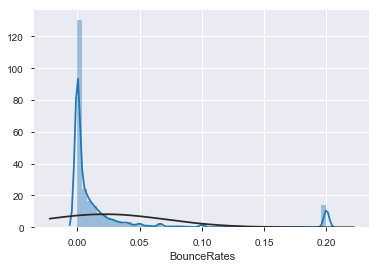

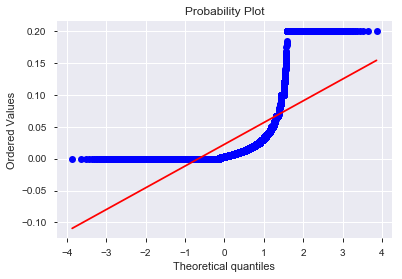

In [104]:
from scipy.stats import norm
sns.distplot(data['BounceRates'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['BounceRates'], plot=plt)

In [105]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

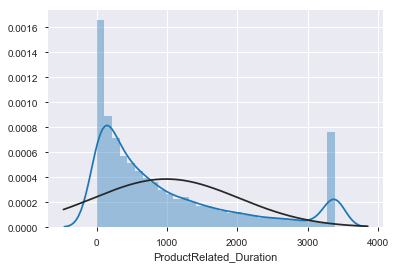

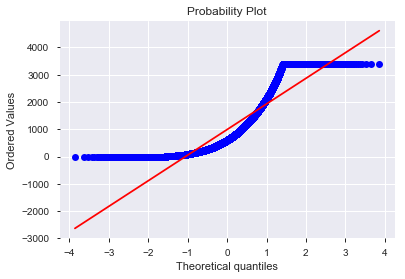

In [106]:
from scipy.stats import norm
sns.distplot(data['ProductRelated_Duration'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['ProductRelated_Duration'], plot=plt)

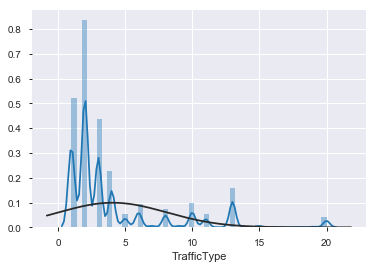

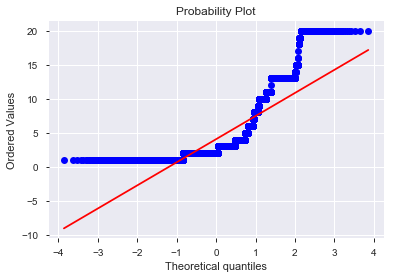

In [124]:
from scipy.stats import norm
sns.distplot(data['TrafficType'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['TrafficType'], plot=plt)
# as it has many levels, so it havs multiple gaussian curve

In [108]:
# group by 
data.groupby(['VisitorType']).BounceRates.median()

VisitorType
New_Visitor          0.000000
Other                0.000000
Returning_Visitor    0.005263
Name: BounceRates, dtype: float64

In [109]:
# group by 
data.groupby(['VisitorType']).BounceRates.mean()

VisitorType
New_Visitor          0.005261
Other                0.038551
Returning_Visitor    0.024778
Name: BounceRates, dtype: float64

In [110]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [111]:
data.groupby(['Region'])['Administrative_Duration','Informational_Duration','ProductRelated_Duration'].median()

Administrative_Duration  Informational_Duration  \
Region                                                    
1                          5.00                     0.0   
2                         10.55                     0.0   
3                         11.00                     0.0   
4                         10.15                     0.0   
5                         15.10                     0.0   
6                          0.00                     0.0   
7                          7.00                     0.0   
8                         29.32                     0.0   
9                          4.00                     0.0   

        ProductRelated_Duration  
Region                           
1                    592.668750  
2                    638.916667  
3                    610.309524  
4                    606.409722  
5                    585.083333  
6                    591.000000  
7                    624.760000  
8                    629.042857  
9                    493.000000

In [112]:
data.groupby(['Browser']).agg({'ExitRates' : 'mean', 'BounceRates' : 'median'})

ExitRates  BounceRates
Browser                        
1         0.046749     0.004082
2         0.041927     0.003448
3         0.058552     0.005714
4         0.039741     0.000000
5         0.042367     0.001754
6         0.043415     0.004307
7         0.044171     0.000000
8         0.052574     0.004762
9         0.050000     0.020000
10        0.037836     0.000000
11        0.043915     0.000000
12        0.050337     0.003529
13        0.052842     0.000000

In [113]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [114]:
data.groupby(['OperatingSystems', 'Browser',"Region","Month"]).TrafficType.mean().tolist()
#grouping alll the OS, Browser,Region,Monthly with fair type

DataError: No numeric types to aggregate

In [115]:
#  my findings is thatwe every column is right skewed
# we have too apply al the techniques of SMOTE as we have unbalanced Target variable
# data is collected in a year from a shopping platform.
# this dataset has so many Outliers, but we can not remove Outlieers, because we are not permissible and also
# WE DON'T believe in data points removal as it leada to make loophole in a dataset while building model
# if we leave dataset, means we are not considering all the scenarios in model
# we also apply standard scaling 
# we have to use Linear Discriminant Analysis
# we can use smote to give equally weightage to target variabe
# we can use alll the scenarios like SMOT, SMOTENIK method to del with unbalanced
# we can also use OCAto do the things workout.